In [27]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [28]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [29]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [30]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [31]:
# Terminal_calcs=[]
# Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for i in range(4):
          
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                          lifecycle = lifecycle, 
#                          elements = demand + vessels, 
#                          operational_hours = 7665,   # example Wijnand
#                          debug=True,
#                          crane_type_defaults=CraneDefaultsList[i]) 
#     NPV=Terminal_dummy.simulate()
#     Terminal_calcs.append(NPV)
# #                          storage_type_defaults=container_defaults.silo_data)
          
#           stack_equipment = 'sc', laden_stack = 'sc'

In [32]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [33]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 67
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 67
  Total cargo volume: 200000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 0.9889851831143416
     Berth occ

     Berth occupancy planned (after adding crane): 0.5559327449179281
     Berth occupancy online (after adding crane): 1
     Horizontal transport online (@ start of year): 10
     Number of STS cranes (@start of year): 2
     Stack capacity planned (@ start of year): 4800
     Stack capacity online (@ start of year): 4800
     Stack capacity required (@ start of year): 10907.210031347964
     Total laden and reefer ground slots required (@ start of year): 2181.4420062695926
  *** add stack to elements
  *** add stack to elements
     Empty stack capacity planned (@ start of year): 480
     Empty stack capacity online (@ start of year): 480
     Empty stack capacity required (@ start of year): 806.0904612628751
     Empty ground slots required (@ start of year): 134.3484102104792
     OOG slots planned (@ start of year): 100
     OOG slots online (@ start of year): 100
     OOG slots required (@ start of year): 202.24491859642026
  *** add empty stack to elements
     Number of stack 

43950.5 75008.592 2937.6 12800.0 2598.75
43950.5 75008.592 2937.6 12800.0 2598.75
     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 300000000
     Revenues (throughput): 214620000
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
PV: [-1.46235840e+07 -5.49988588e+07  9.11206691e+07  9.21815283e+07
  9.31156413e+07  9.39381510e+07  1.49668542e+08  2.67413236e+08
  2.88454102e+08  2.89833549e+08]
NPV: 1296102975.5829537


## Report all elements

In [34]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [35]:
#Terminal.terminal_elements_plot()

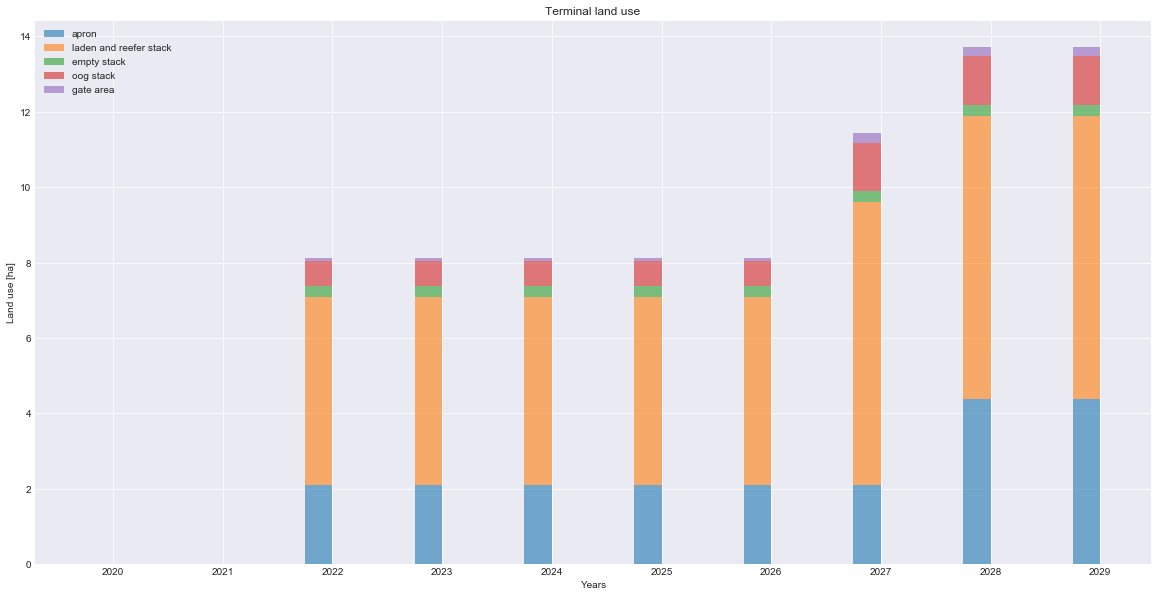

In [36]:
Terminal.land_use_plot()

In [37]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

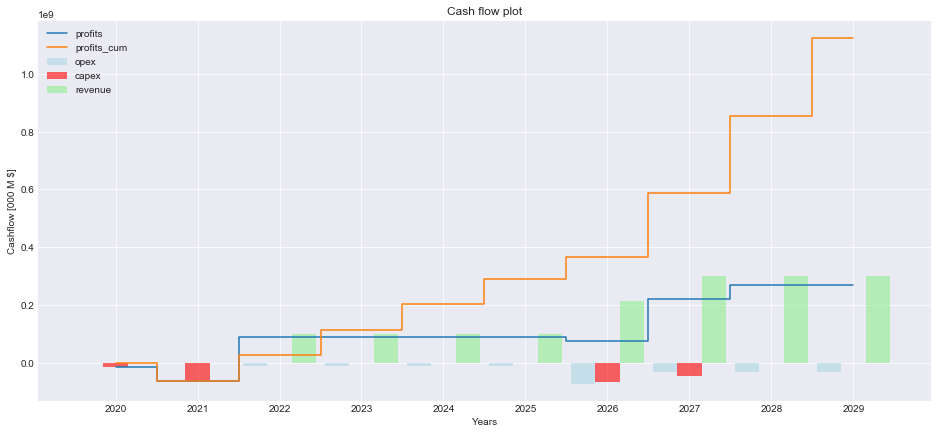

In [38]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [39]:
Terminal.NPV()

PV: [-1.46235840e+07 -5.49988588e+07  9.11206691e+07  9.21815283e+07
  9.31156413e+07  9.39381510e+07  1.49668542e+08  2.67413236e+08
  2.88454102e+08  2.89833549e+08]
NPV: 1296102975.5829537
